In this notebook I look at stability space calculations for profiles with a skin thickness of 0.003. Around this skin thicknes the variations in the skin thickness were found to not have a large effect on the $\bar{k}=0$ boundary of the sausage instability.


These integrations were done after I made sure the delta is plugged into the same potential energy formulation as used in the analytic derivaton.
I also fixed a error where I was using $\delta= \frac{\xi' f a}{\xi}$ instead of $\delta= \frac{\xi' a}{\xi}$.

# Import libraries

In [2]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [21]:
import numpy as np
import sys
sys.path.append('..')
sys.path.append('../../../provenance_scripts/')
import skin_core_scanner_simple as scss
reload(scss)
import equil_solver as es
reload(es)
import newcomb_simple as new
reload(new)
import external_stability as ext
reload(ext)
import newcomb_init as init
reload(init)
import analytic_condition as ac
reload(ac)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import lambda_k_plotting_simple as plot
reload(plot)

<module 'lambda_k_plotting_simple' from '../lambda_k_plotting_simple.py'>

# $\epsilon$ = 1.0, $r_{core}=0.997$

This is a contour plot of $dW$ for kink mode.

$\frac{[2 \bar{k} - m \bar{\lambda}] [(\delta + 1) 2 \bar{k} - (\delta-1) m \bar{\lambda}]}{\bar{k}^2+m^2} - \frac{(m \bar{\lambda} - 2 \bar{k})^2}{\bar{k}} \frac{K_m(|\bar{k}|)}{K_m'(|\bar{k}|)} > 0$

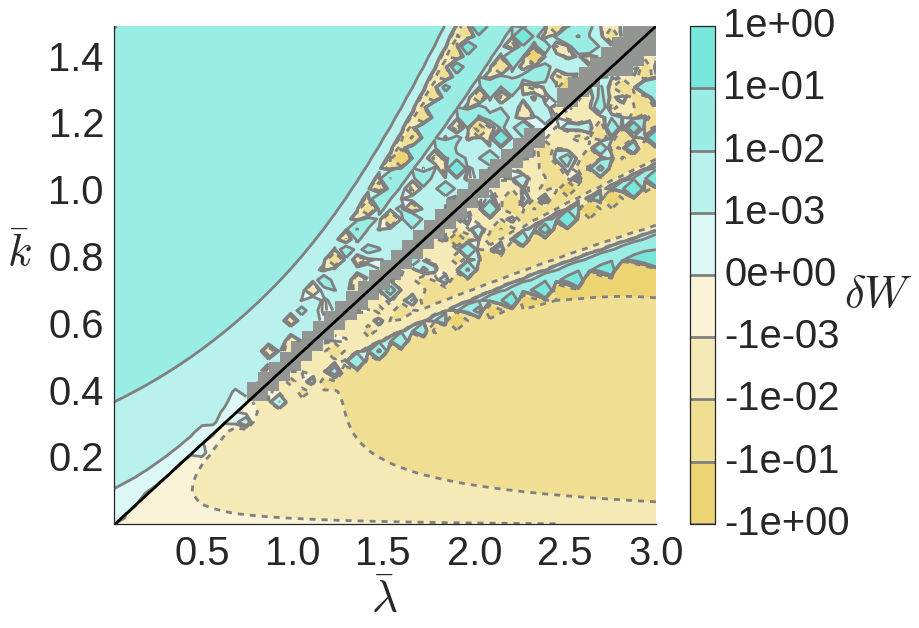

In [8]:
plot.plot_lambda_k_space_dw('../../output/2015-11-10-12-01/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=False)

The red lines are the analytical stability conditions for $\epsilon=1$ and the given $\delta$.

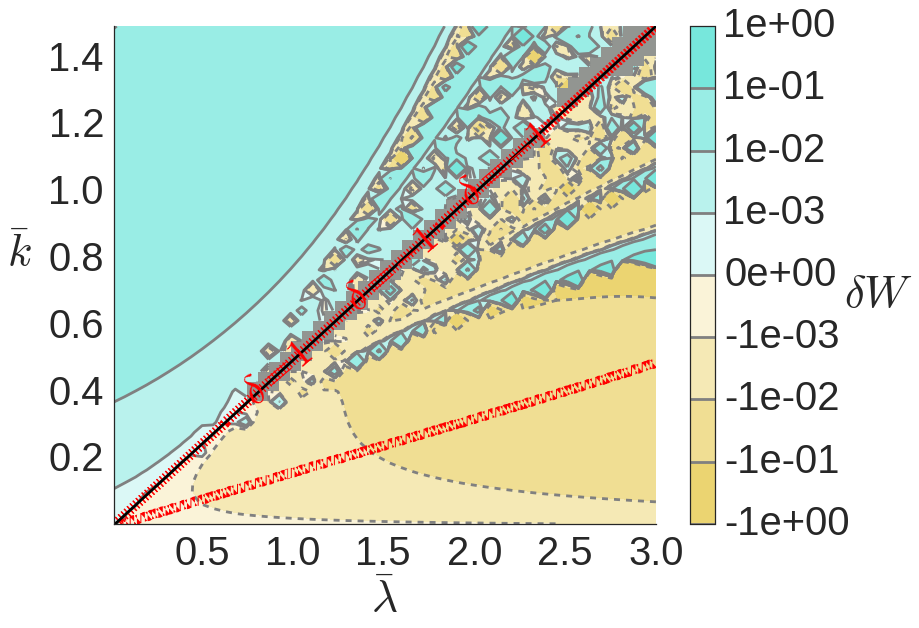

In [62]:
plot.plot_lambda_k_space_dw('../../output/2015-11-10-12-01/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 0.4), (1.5, 0.8), (2.0, 1.2)],
                            floor_norm=True, analytic_compare=True)

$\frac{[2 \bar{k} - m \epsilon \bar{\lambda}] [(\delta + 1) 2 \bar{k} - (\delta-1) m \epsilon \bar{\lambda}]}{\bar{k}^2+m^2} + (\epsilon^2 - 1)\bar{\lambda}^2 - \frac{(m \bar{\lambda} - 2 \bar{k})^2}{\bar{k}} \frac{K_m(|\bar{k}|)}{K_m'(|\bar{k}|)} > 0$

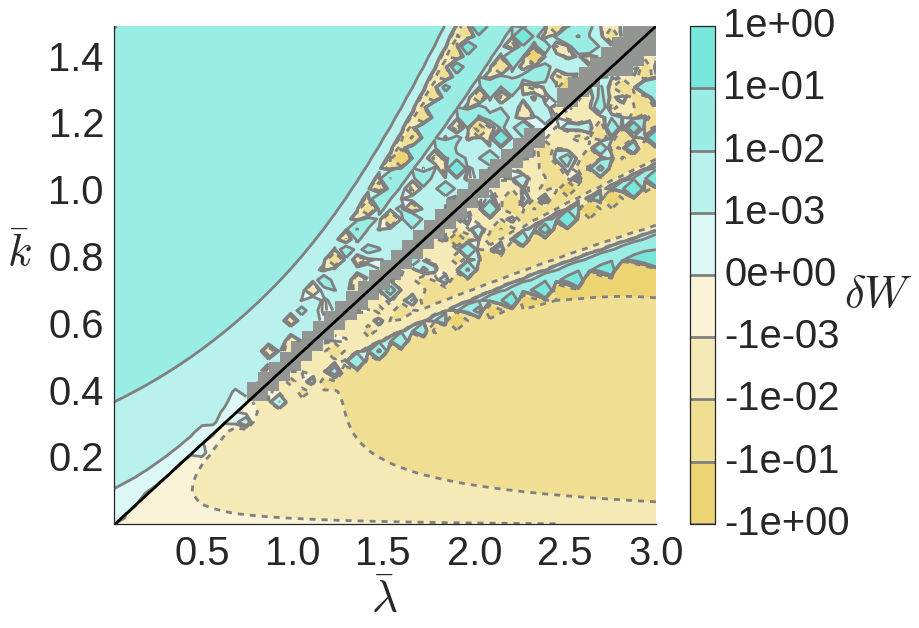

In [24]:
plot.plot_dW_given_delta('../../output/2015-11-10-12-01/meshes.npz', 
                            1.0, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True)

This is a plot of the numerically calculated delta.

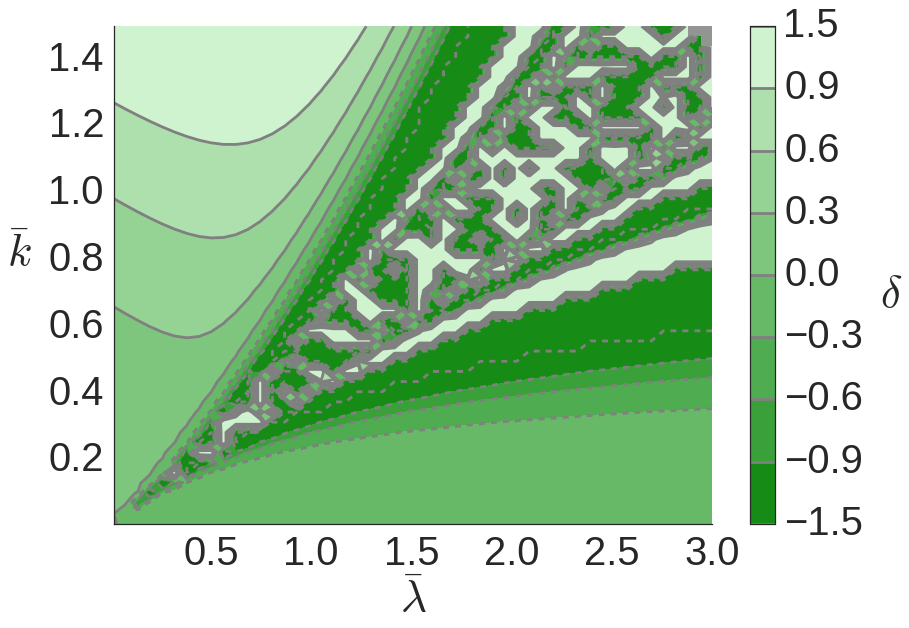

In [42]:
plot.plot_lambda_k_space_delta('../../output/2015-11-10-12-01/meshes.npz',
                               1, levels=[-1.5, -0.9, -0.6, -0.3, 0, 
                                          0.3, 0.6, 0.9, 1.5],
                              interpolate=True, clip=True, delta_min=-1.5, delta_max=1.5)

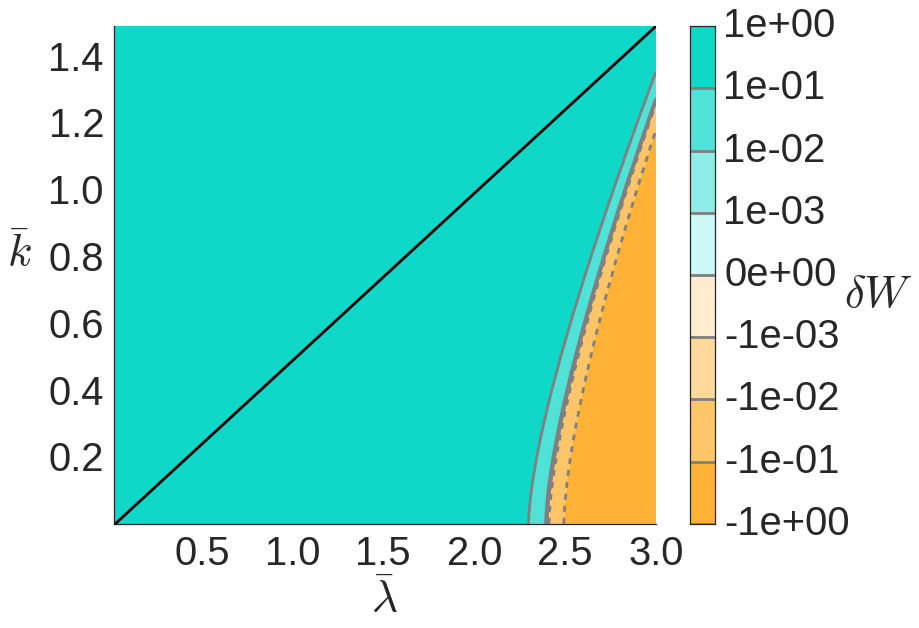

In [55]:
plot.plot_lambda_k_space_dw('../../output/2015-11-10-12-01/meshes.npz', 
                            1.0, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False)

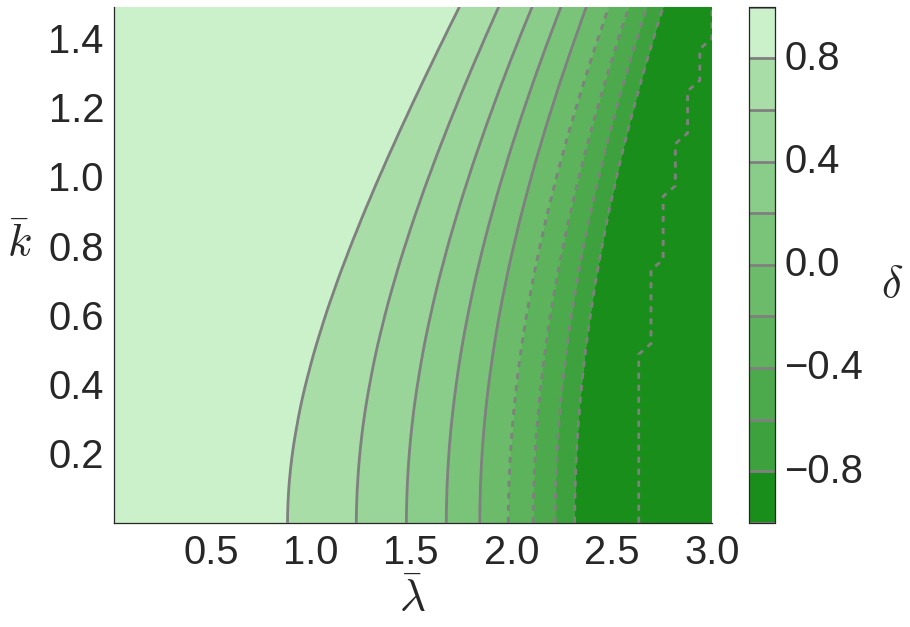

In [47]:
plot.plot_lambda_k_space_delta('../../output/2015-11-10-12-01/meshes.npz',
                               0, levels=[-1.5, -0.8, -0.6, -0.4, -0.2, 0, 
                                          0.2, 0.4, 0.6, 0.8, 1.5],
                              interpolate=True, clip=True, delta_min=-1.5, delta_max=1.5)

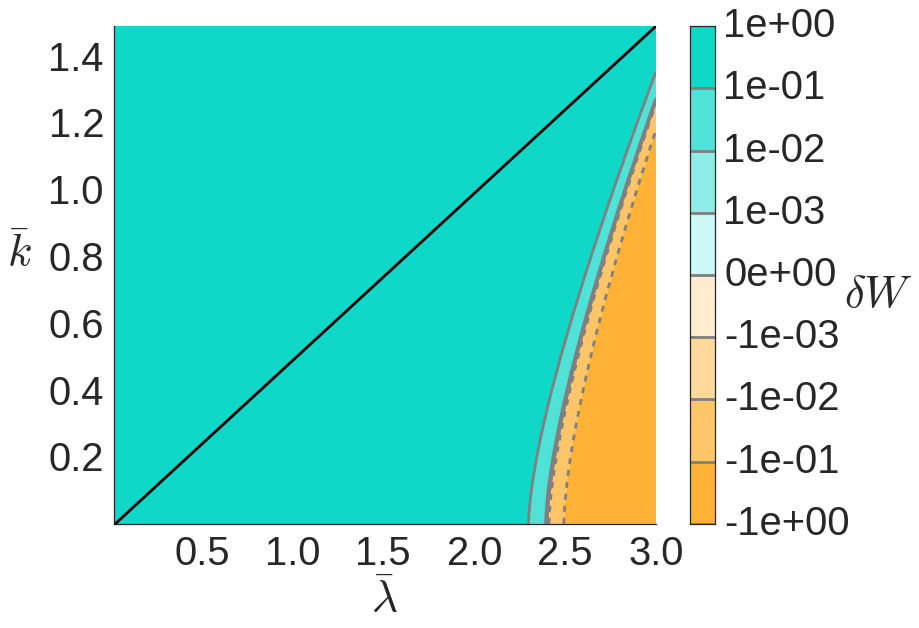

In [22]:
plot.plot_dW_given_delta('../../output/2015-11-10-12-01/meshes.npz', 
                            1.0, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=False)

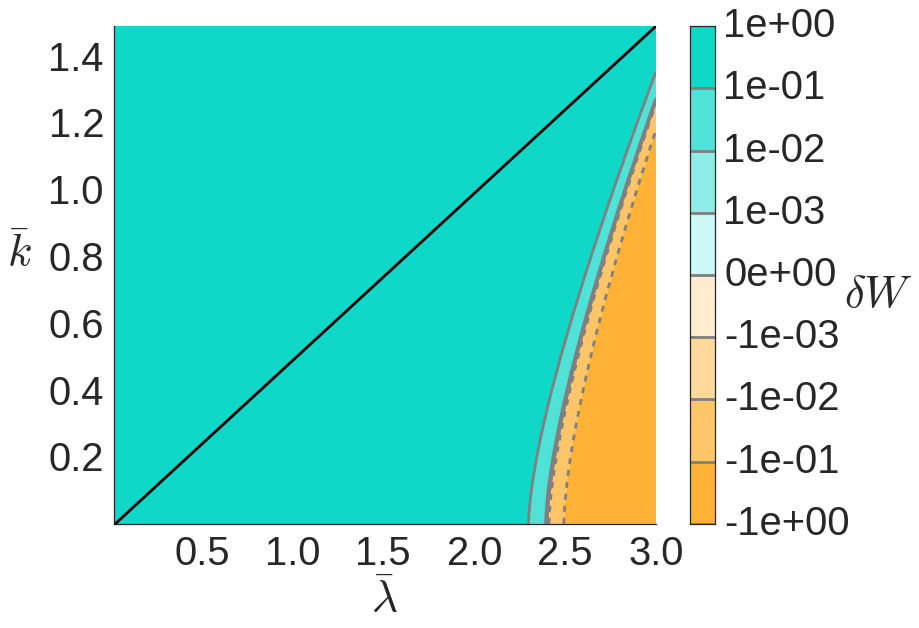

In [23]:
plot.plot_dW_given_delta('../../output/2015-11-10-12-01/meshes.npz', 
                            1.0, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True)

# $\epsilon$ = 0.1, $r_{core}=0.997$

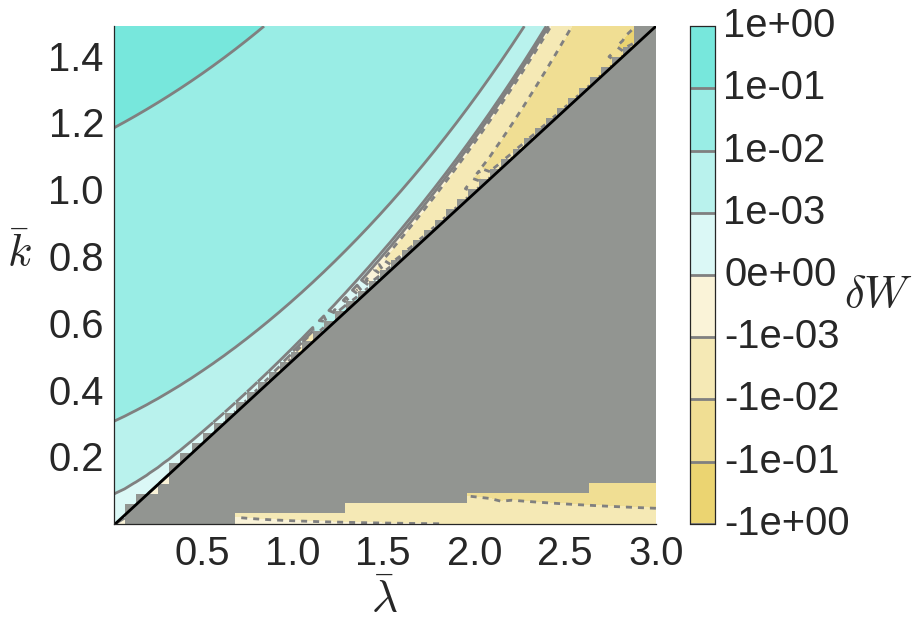

In [4]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-19/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=False)

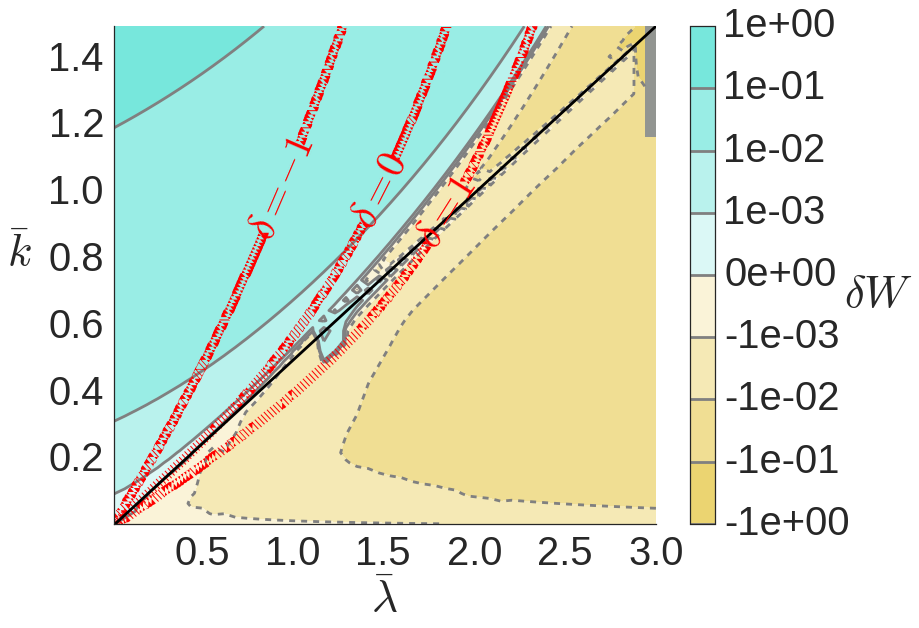

In [57]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-19/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=True,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=True)

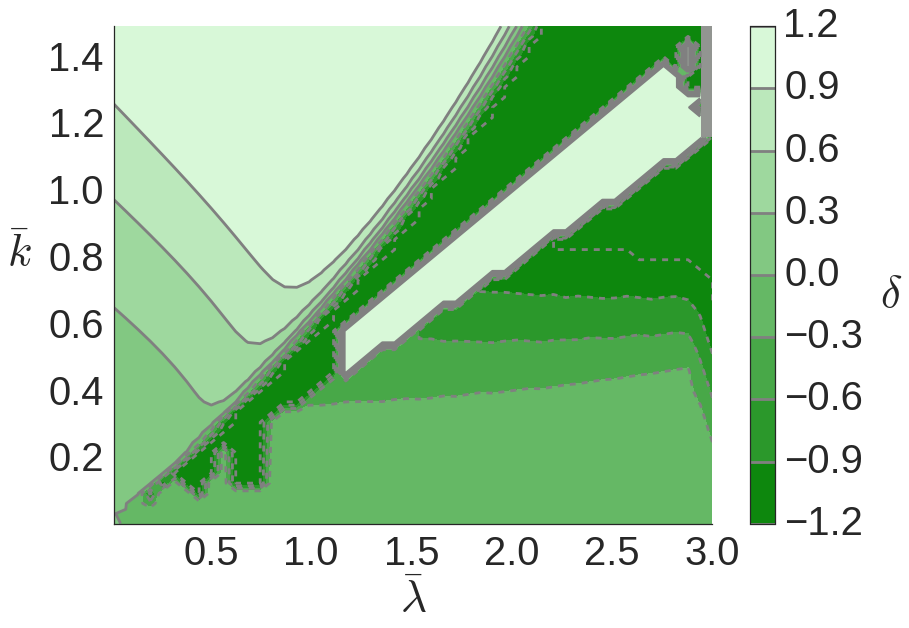

In [11]:
plot.plot_lambda_k_space_delta('../../output/2015-11-09-23-19/meshes.npz',
                               1, levels=[-1.2, -0.9, -0.6, -0.3, 0, 
                                          0.3, 0.6, 0.9, 1.2],
                              interpolate=True, clip=True, delta_min=-1.2, delta_max=1.2)

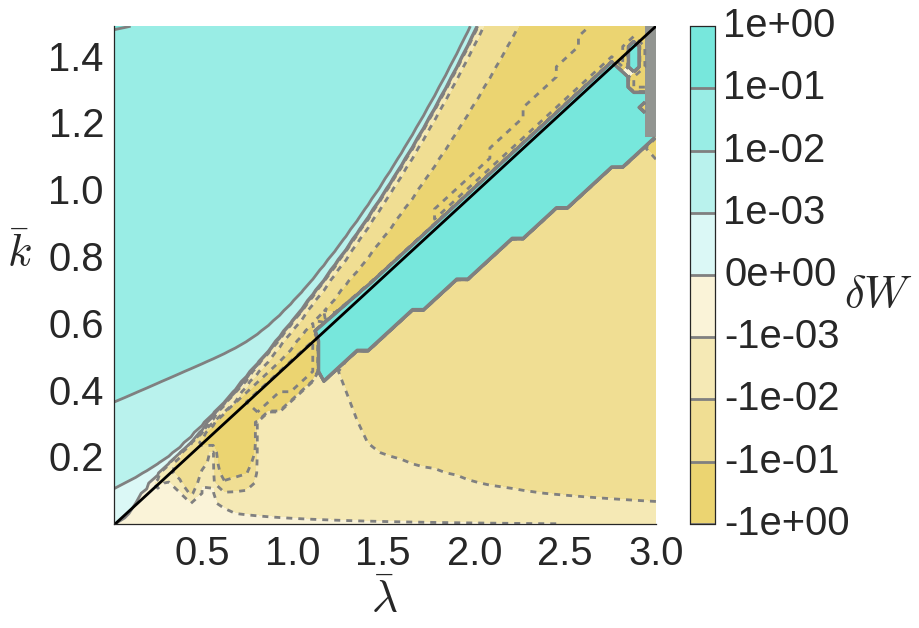

In [28]:
plot.plot_dW_given_delta('../../output/2015-11-09-23-19/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True,
                            interpolate=True)

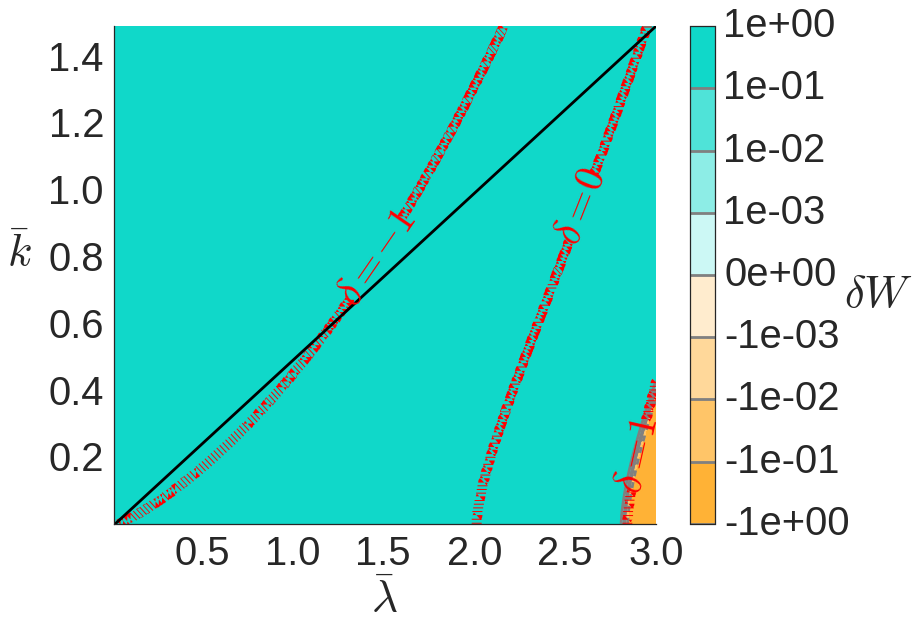

In [58]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-19/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1],
                            label_pos=[(1.0, 1.), (2.4, 1.0), (3.0, 0.2)],
                            floor_norm=True, analytic_compare=True)

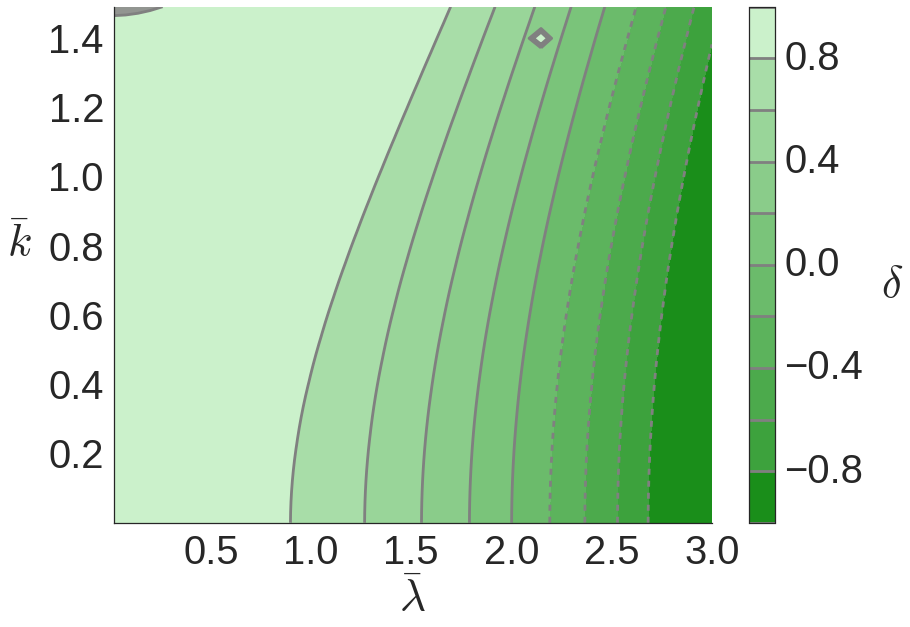

In [104]:
plot.plot_lambda_k_space_delta('../../output/2015-11-09-23-19//meshes.npz',
                               0, levels=[-1.5, -0.8, -0.6, -0.4, -0.2, 0, 
                                          0.2, 0.4, 0.6, 0.8, 1.5])

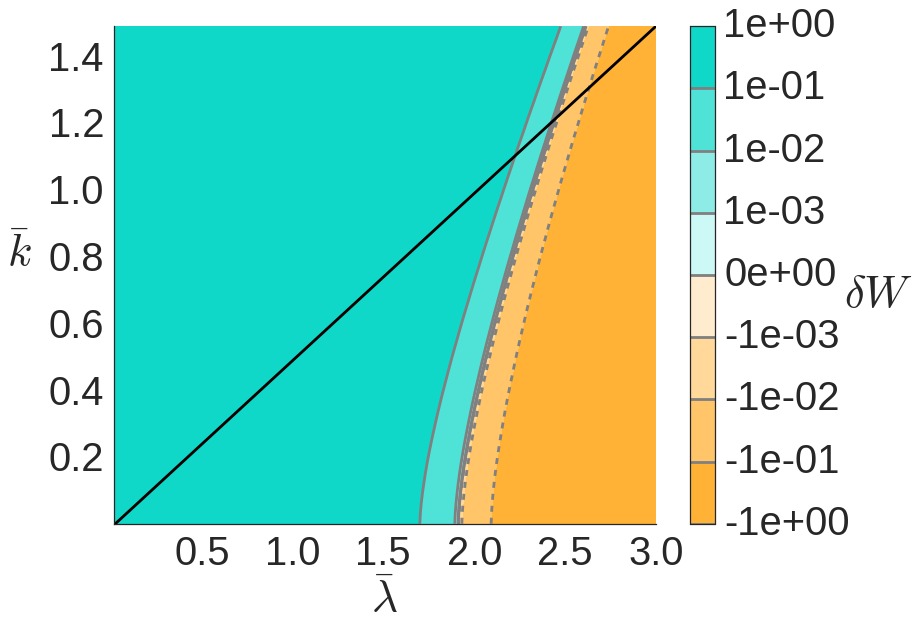

In [29]:
plot.plot_dW_given_delta('../../output/2015-11-10-12-01/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True)

# $\epsilon$ = 0.5

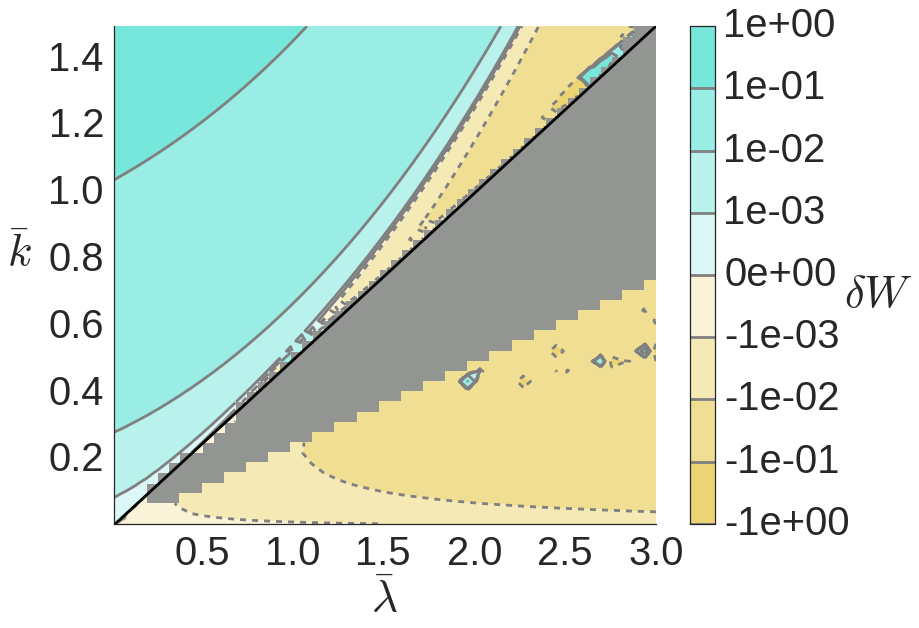

In [6]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-35/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=False)

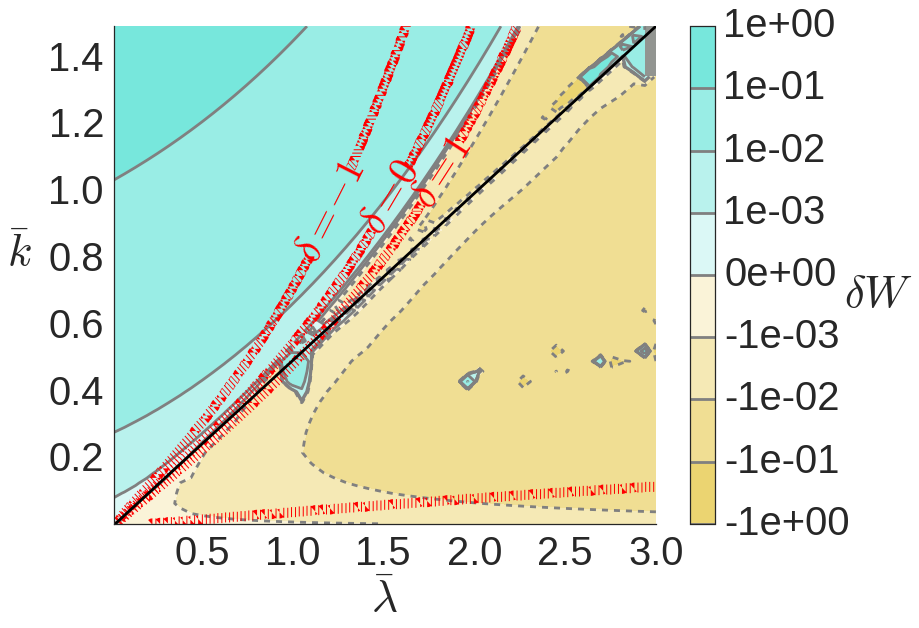

In [59]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-35/meshes.npz', 
                            0.5, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, 
                            interpolate=True,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (2.0, 1.)],
                            analytic_compare=True)


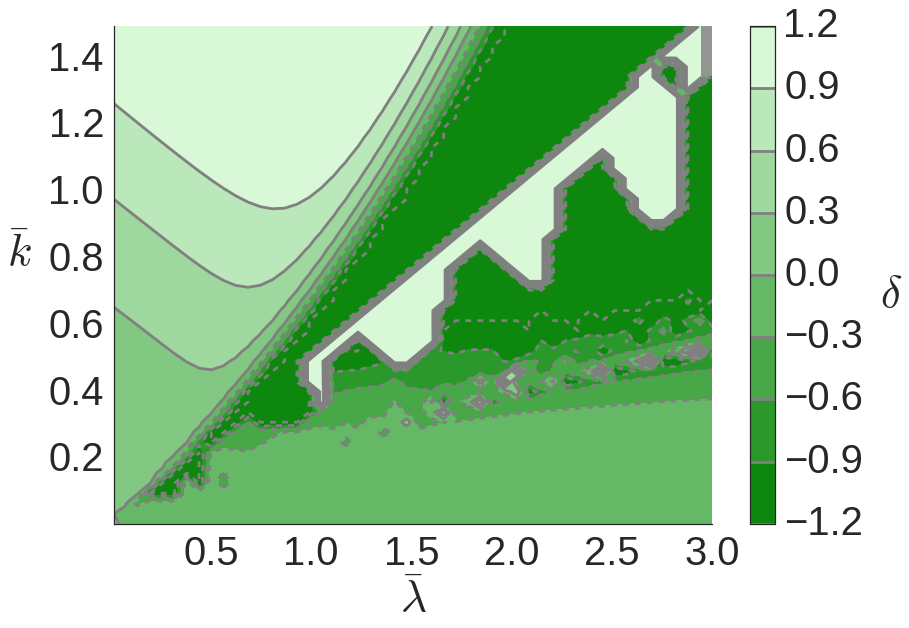

In [37]:
plot.plot_lambda_k_space_delta('../../output/2015-11-09-23-35/meshes.npz',
                               1, levels=[-1.2, -0.9, -0.6, -0.3, 0, 
                                          0.3, 0.6, 0.9, 1.2],
                              interpolate=True, clip=True, delta_min=-1.2, delta_max=1.2)

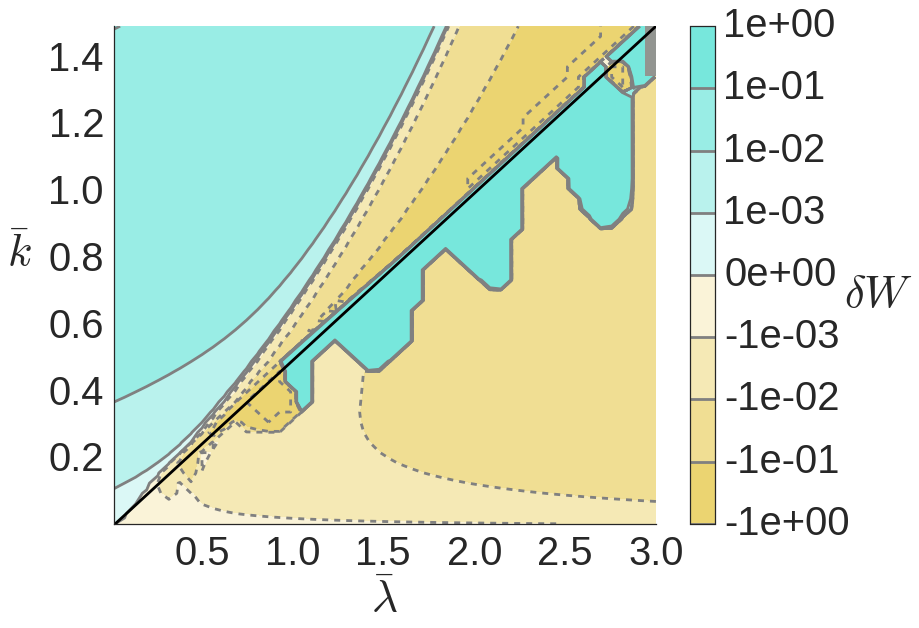

In [35]:
plot.plot_dW_given_delta('../../output/2015-11-09-23-35/meshes.npz', 
                            0.5, 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True,
                            interpolate=True)

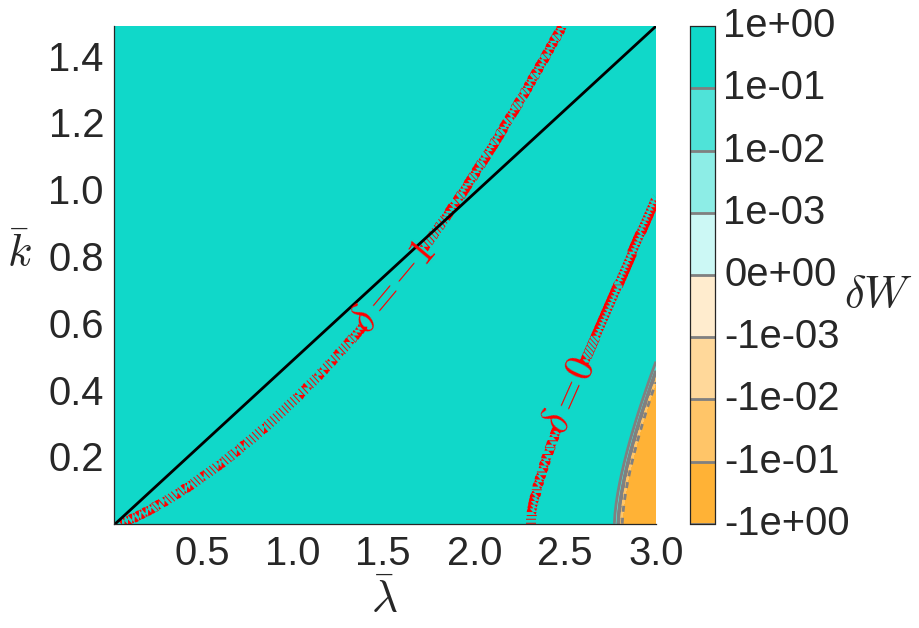

In [61]:
plot.plot_lambda_k_space_dw('../../output/2015-11-09-23-35/meshes.npz', 
                            0.5, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=True)

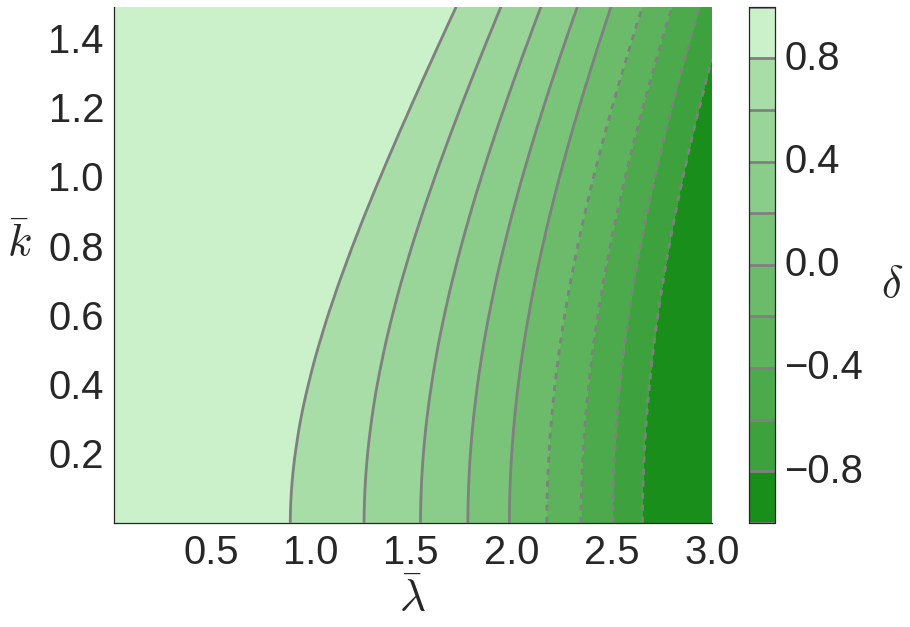

In [63]:
plot.plot_lambda_k_space_delta('../../output/2015-11-09-23-35/meshes.npz',
                               0, levels=[-1.5, -0.8, -0.6, -0.4, -0.2, 0, 
                                          0.2, 0.4, 0.6, 0.8, 1.5],
                              interpolate=True, clip=True, delta_min=-1.5, delta_max=1.5)

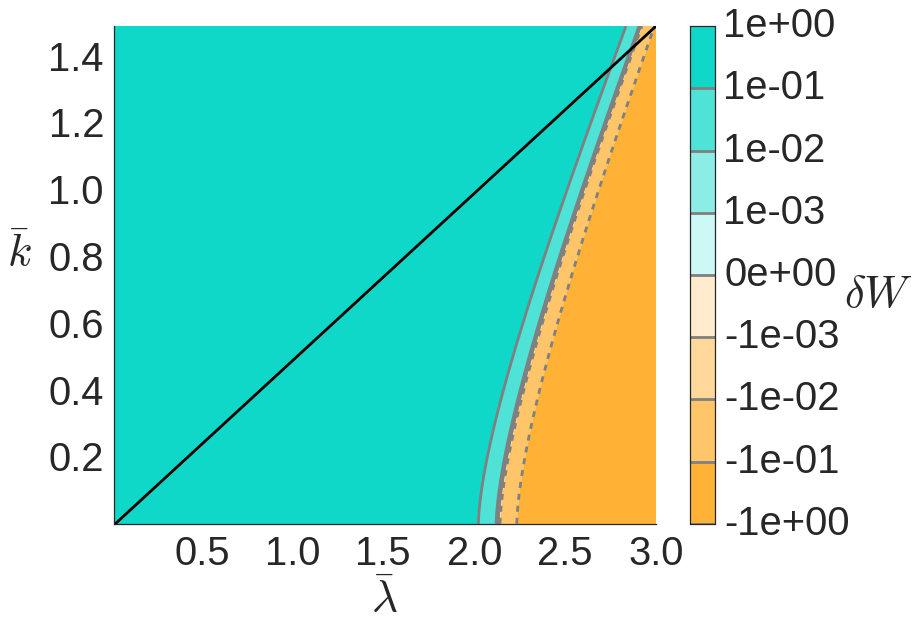

In [32]:
plot.plot_dW_given_delta('../../output/2015-11-09-23-35/meshes.npz', 
                            0.5, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True)